# Random Forest


## Imports


In [1]:
import util
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier


## Read the data


### Train Data


In [2]:
X, y = util.getData(path='../data/train_data.csv', scaleNumericalFeatures=True)

# create a new column called weightOverHeightSquared
# X['weightOverHeightSquared'] = X['Weight'] / X['Height'] ** 2

# X = X[['Weight', 'Height']]


### Validation Data


In [3]:
# Divide the train data into training and validation
X_train = X[:int(0.8 * len(X))]
y_train = y[:int(0.8 * len(y))]
X_val = X[int(0.8 * len(X)):]
y_val = y[int(0.8 * len(y)):]


### Test Data


In [4]:
X_test, y_test = util.getData(
    path='../data/train_data.csv', scaleNumericalFeatures=True)

# create a new column called weightOverHeightSquared
# X_test['weightOverHeightSquared'] = X_test['Weight'] / X_test['Height'] ** 2

# X_test = X_test[['Weight', 'Height']]


## Train the model


In [5]:
clf = RandomForestClassifier(
    n_estimators=50, max_depth=20, min_samples_split=2)
clf.fit(X, y)
cv_results = cross_validate(clf, X, y, cv=5, scoring=[
                            'f1_macro', 'accuracy', 'f1_micro'])

print('accuracy: ', cv_results['test_accuracy'].mean())
print('f1_macro: ', cv_results['test_f1_macro'].mean())
print('f1_micro: ', cv_results['test_f1_micro'].mean())


accuracy:  0.9373203175284275
f1_macro:  0.9070396324239803
f1_micro:  0.9373203175284275


## Model Analysis


### Feature Importance Plot

A feature importance plot shows the importance of each feature in the model. It can be used to identify the most important features and to understand the impact of each feature on the model's predictions.


                            feature  importance
0                            Weight    0.479602
1                            Height    0.121659
2                               Age    0.107249
3                        Meal_Count    0.079048
5                     Water_Consump    0.068434
4                          Phys_Act    0.066316
15  Transport_Public_Transportation    0.015205
11               Alcohol_Consump_no    0.014694
10        Alcohol_Consump_Sometimes    0.013236
12             Transport_Automobile    0.012069
16                Transport_Walking    0.006439
9        Alcohol_Consump_Frequently    0.005363
6                        Smoking_no    0.003634
7                       Smoking_yes    0.003422
13                   Transport_Bike    0.002229
14              Transport_Motorbike    0.001292
8            Alcohol_Consump_Always    0.000109


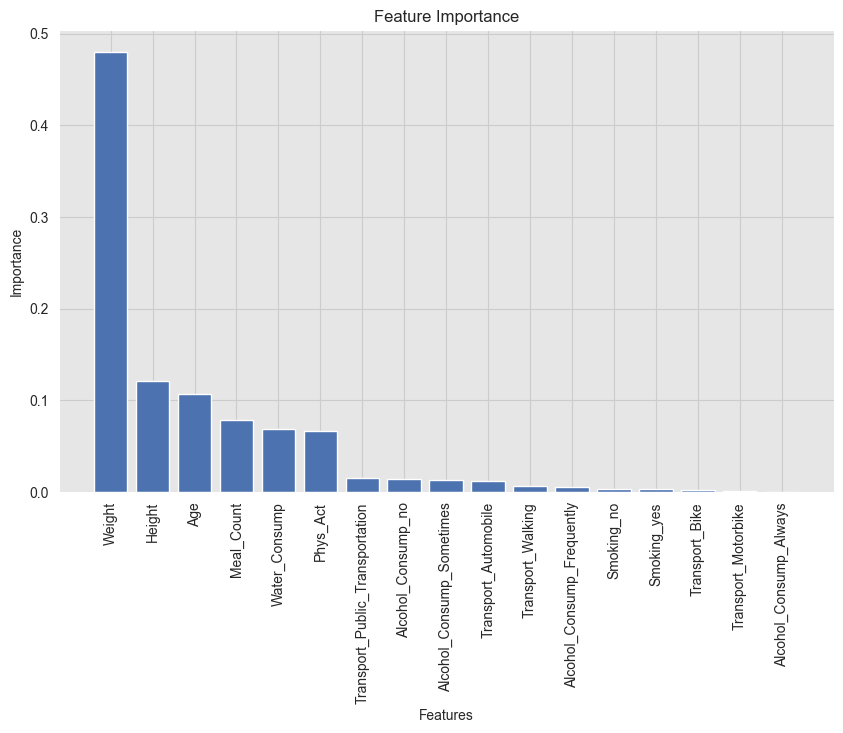

In [6]:
# Get the feature importance
importance = clf.feature_importances_

feature_importance = util.getFeatureImportance(
    features=X.columns, importance=importance)
print(feature_importance)

plt = util.getFeatureImportancePlot(feature_importance)
plt.show()


### Learning Curves Plot

show the training error (Ein) and validation error (Eval) as a function of the training set size


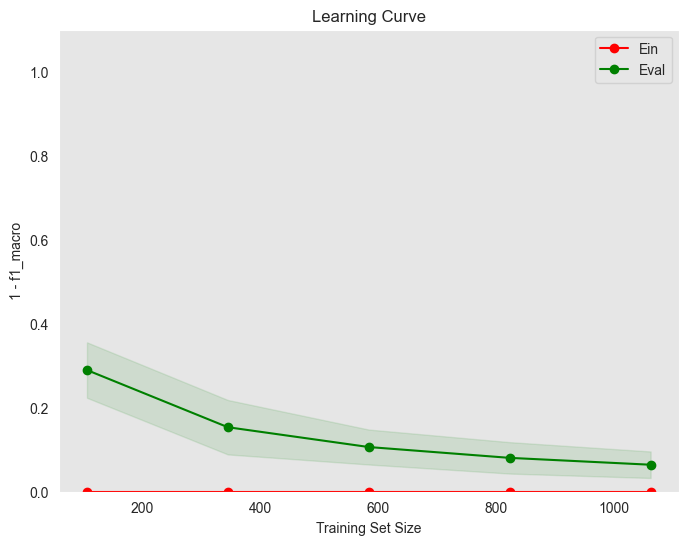

In [7]:
plt = util.getLearningCurvePlot(estimator=RandomForestClassifier(
    n_estimators=50, max_depth=20, min_samples_split=2), X=X, y=y, cv=10)
plt.show()


### Partial Dependence Plot:

A partial dependence plot shows the relationship between a feature and the model's predictions while holding all other features constant. It can be used to understand the impact of a single feature on the model's predictions i.e. PDPs show the average effect on predictions as the value of feature changes.

From the plots, we may see the type of the relationship between a feature and a prediction. Some relationships may look linear whereas other are more complex.


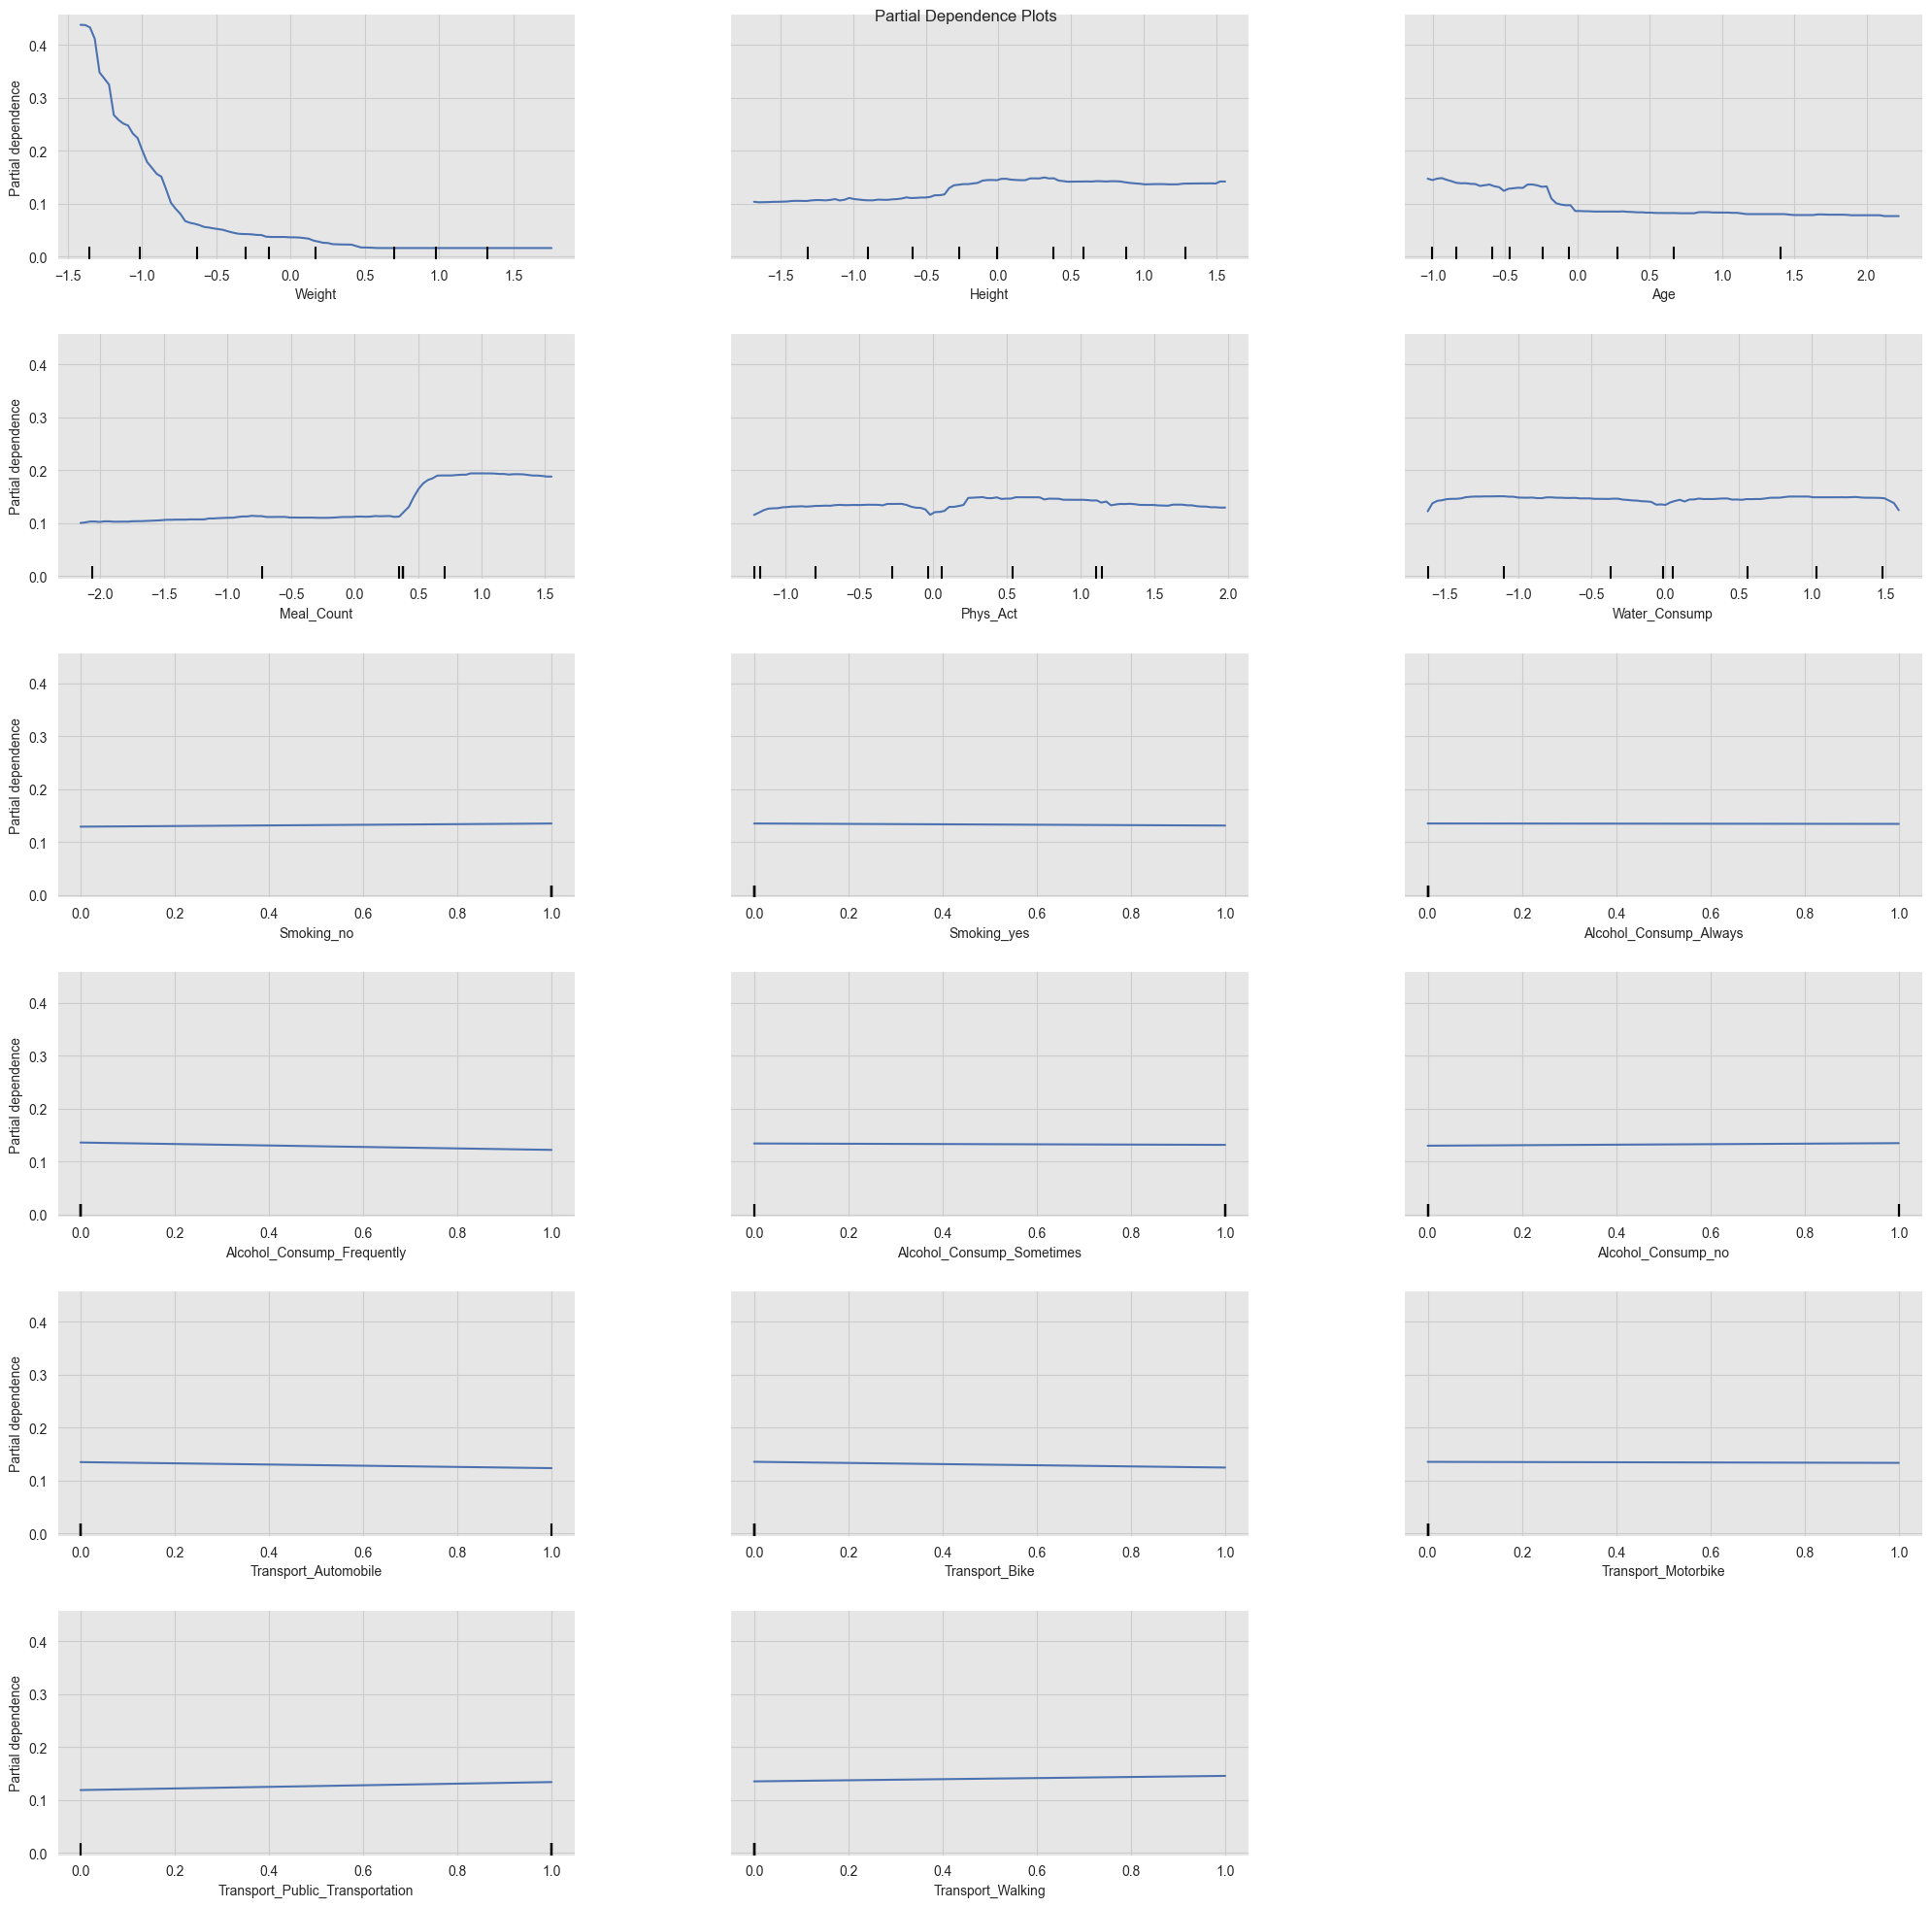

In [8]:
plt = util.getPartialDependenciesPlot(clf, X)
plt.show()


### Hyperparameter Tuning

This is a process of adjusting the parameters of a model to optimize its performance. It can be done using techniques like grid search, random search, or Bayesian optimization.


In [9]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [5, 10, 20, 50, 100],
    'max_depth': [10, 20, 50, 100, 500],
    'min_samples_split': [2, 5, 10]
}


### Grid Search


In [10]:
grid_search = util.getGridSearch(estimator=RandomForestClassifier(
), param_grid=param_grid, X=X_train, y=y_train, cv=10, scoring='f1_macro')
# Print the results
print("Best parameters found:", grid_search.best_params_)
print("Best score found:", grid_search.best_score_)
print("Test score with best parameters:", grid_search.score(X_val, y_val))


Best parameters found: {'max_depth': 500, 'min_samples_split': 2, 'n_estimators': 100}
Best score found: 0.9367490217560839
Test score with best parameters: 0.928870139398386


### Heatmap


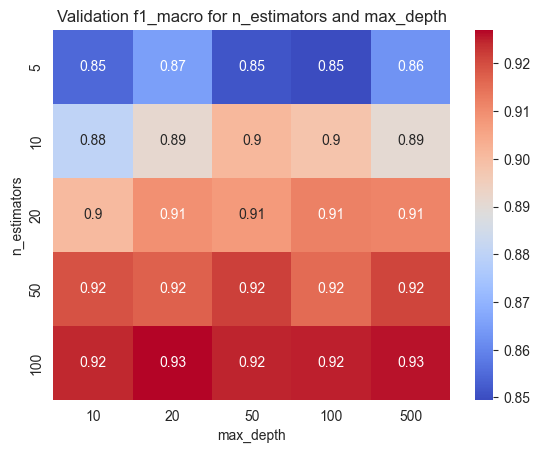

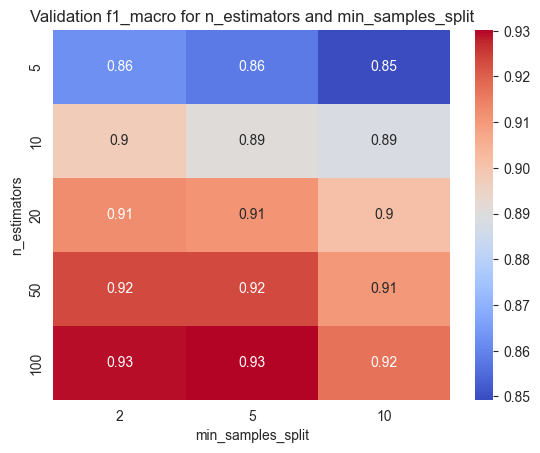

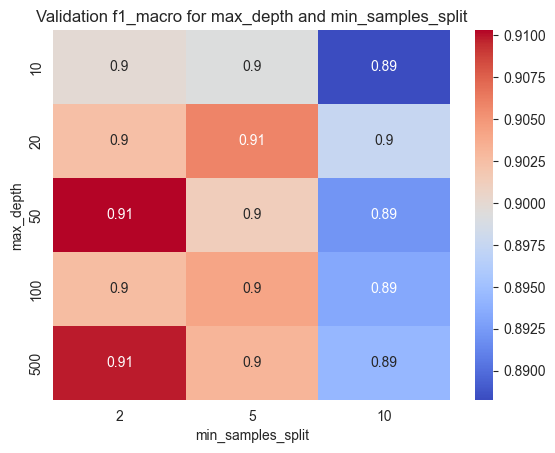

In [11]:
util.plotHyperParamHeatMaps(param_grid, grid_search)


### Train-Validation Curve


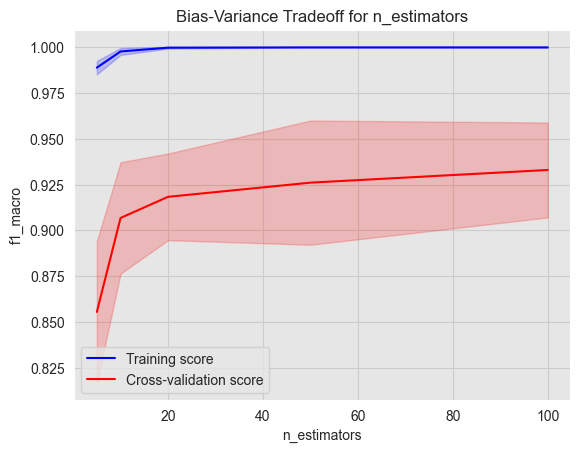

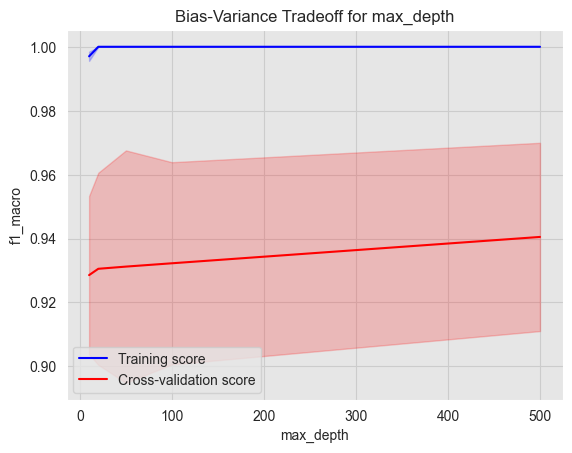

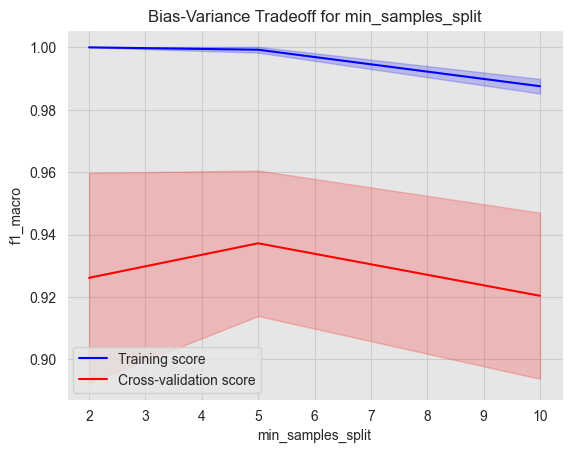

In [12]:

util.plotHyperParamTrainValidationCurve(estimator=RandomForestClassifier(
), param_grid=param_grid, X=X_train, y=y_train, cv=10, scoring='f1_macro')


## Bias-Variance Analysis


In [13]:

clf = RandomForestClassifier(
    n_estimators=50, max_depth=20, min_samples_split=2)

mse, bias, var = util.getBiasVariance(
    clf, X_train=X_train, y_train=y_train, X_test=X_val, y_test=y_val)


In [14]:
print("mse: ", mse)
print("bias: ", bias)
print("var: ", var)


mse:  0.060316455696202545
bias:  0.03235854430379747
var:  0.027957911392405062


### Tree Plot

A tree plot shows the structure of the decision trees used in the random forest. It can be used to understand how the model makes predictions.


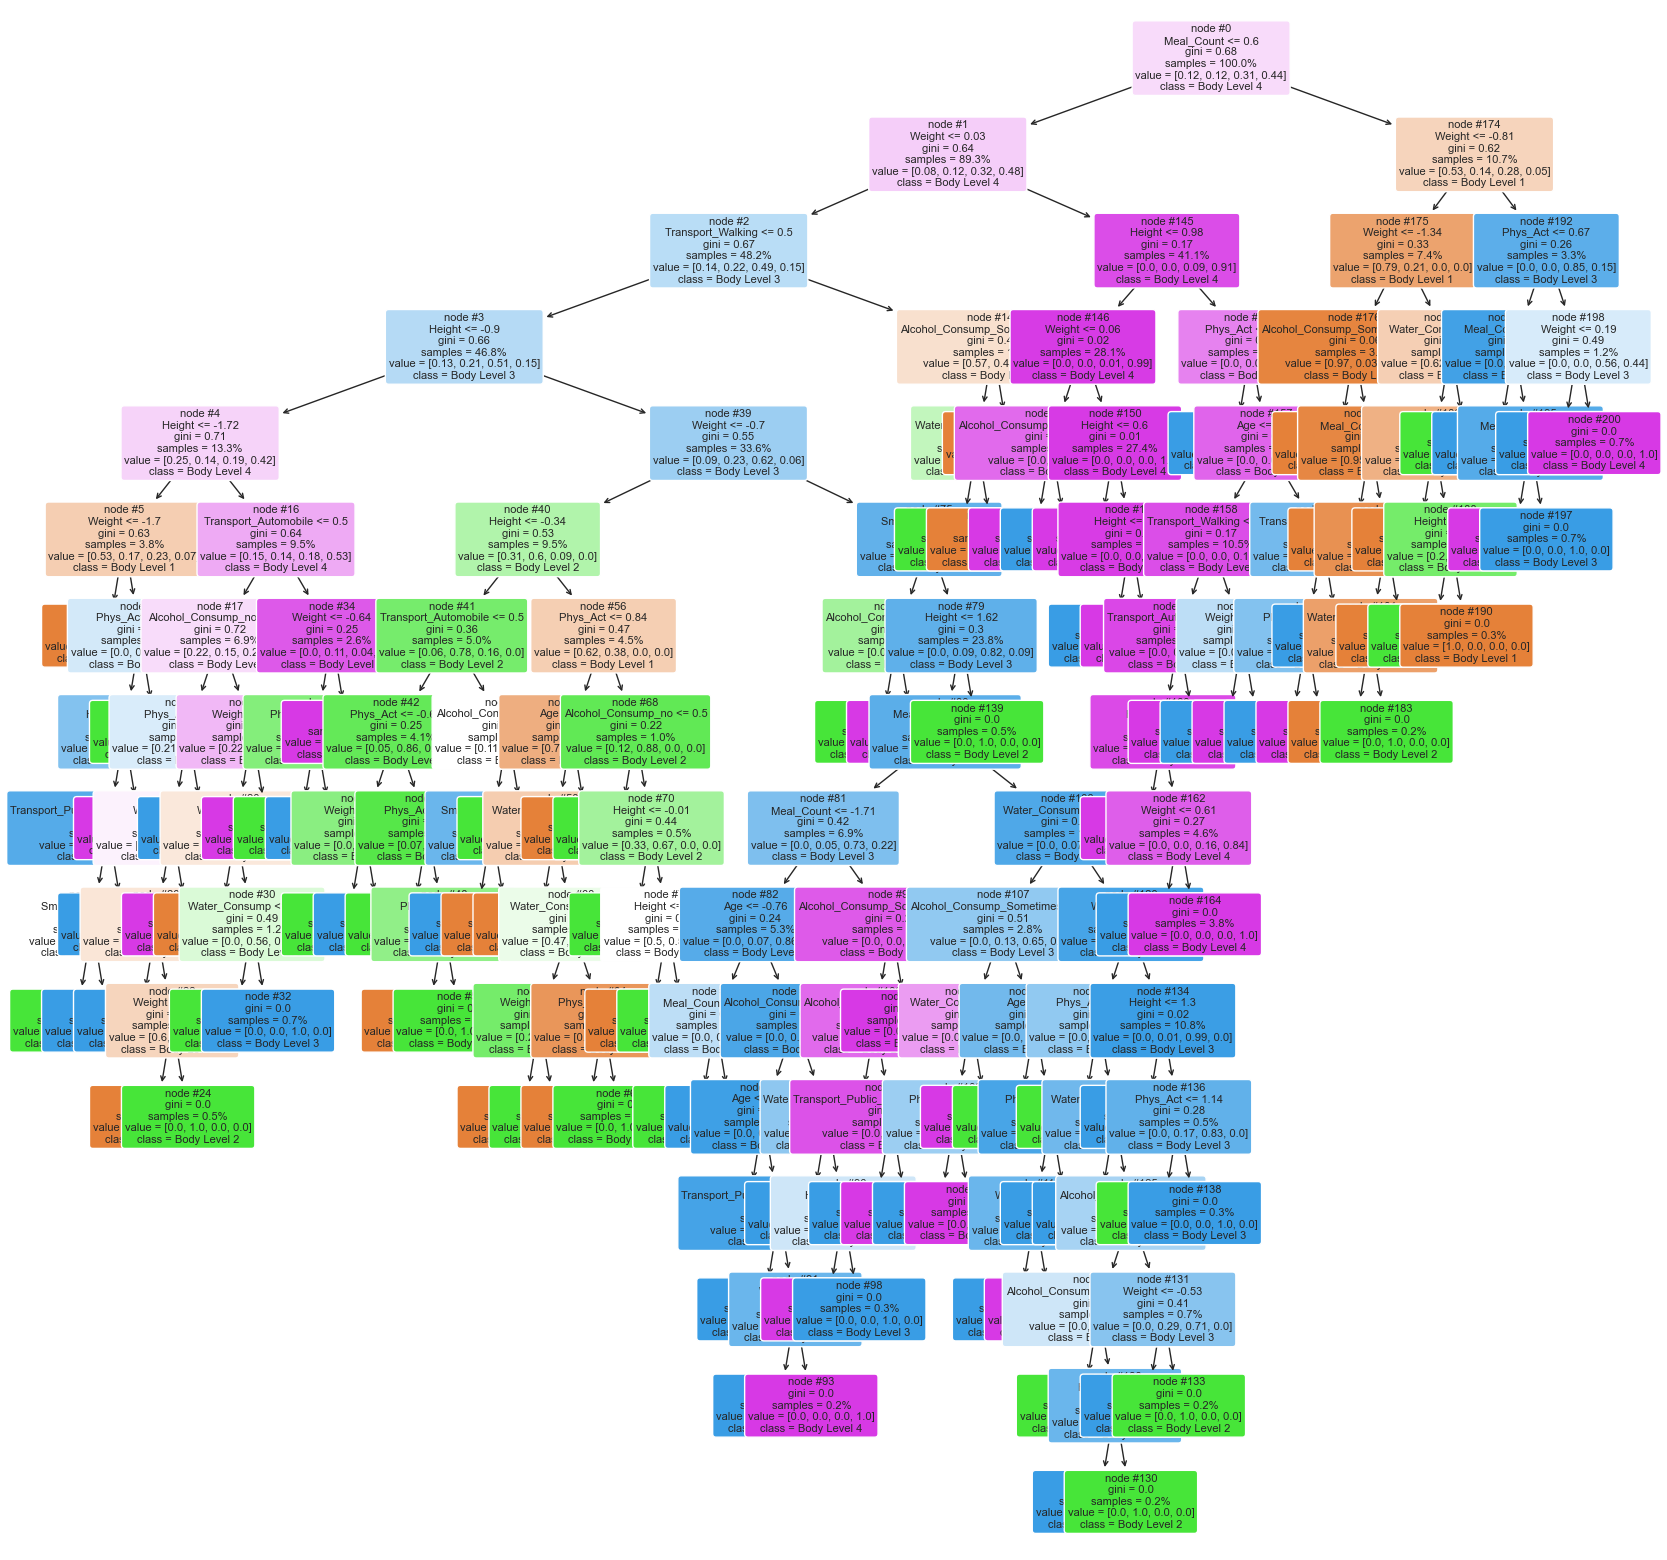

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# impurity=True shows the impurity measure at each node,
# proportion=False does not show the proportion of samples in each class,
# precision=2 sets the precision of the impurity measure to two decimal places,
# node_ids=True shows the node IDs.
plt.figure(figsize=(20, 20))
plot_tree(clf.estimators_[0], feature_names=X.columns, class_names=['Body Level 1', 'Body Level 2', 'Body Level 3', 'Body Level 4'],
          fontsize=8, impurity=True, rounded=True, proportion=True, precision=2, filled=True, node_ids=True)
plt.show()
